<a href="https://colab.research.google.com/github/mahan2210/pytorch_practice/blob/main/Introduction_to_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F

x=torch.randn(1,10)
prev_h= torch.randn(1,20)
W_h=torch.randn(20,20)
W_x=torch.randn(20,10)

i2h = torch.mm(W_x, x.t())
h2h=torch.mm(W_h,prev_h.t())
next_h=i2h+h2h
next_h= next_h.tanh()
loss=next_h.sum()





In [7]:
x

tensor([[ 0.1966, -0.1625, -0.4222, -0.4460,  0.2484, -0.5508,  0.5044, -0.5099,
          0.4394, -0.1108]])

In [8]:
W_x

tensor([[-1.2702, -0.1896,  0.4529, -2.1231, -1.8192, -0.5631, -0.2885,  1.2987,
          1.5363, -0.1384],
        [-0.7657,  1.2353,  1.0816, -1.6448,  0.4686,  0.3715, -0.2677, -0.6033,
         -0.4612,  0.0100],
        [-0.6532, -2.2500, -0.3710,  1.1382,  0.0964, -0.9774,  1.2253, -1.0724,
          0.2836,  1.2303],
        [ 1.8433,  0.2241, -1.0145,  0.0737, -0.7945,  0.7365,  1.3693, -0.8356,
          0.4474,  1.1487],
        [-0.1051,  0.0895,  1.0854,  1.0314, -0.6838,  0.5889,  0.6685,  1.1993,
         -0.4268, -0.7669],
        [ 0.0971, -0.2128,  0.1465,  1.0182, -0.1860,  0.1108, -1.3226,  0.6118,
         -0.1623, -0.4700],
        [ 0.2514, -0.3923,  0.1305, -0.4661,  2.1528,  1.0895, -1.3157,  1.3693,
          0.0944, -0.7062],
        [-0.4782,  0.2975, -0.6943, -0.8095, -0.0781,  0.1381,  0.6331, -0.7121,
          2.0954, -0.5088],
        [-0.1321, -1.3559, -0.4252,  1.3535,  2.3880,  0.5622, -0.3801, -0.0566,
          1.9538, -1.0701],
        [ 1.3535, -

In [9]:
loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [23]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).def__init__
    # kernel
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
         # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features










In [25]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])

In [26]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:02<00:00, 64262511.01it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [27]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

truck horse plane  ship


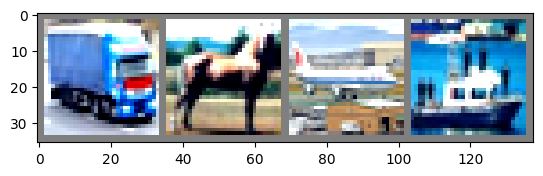

In [28]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [29]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [30]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 frog  bird  frog   car


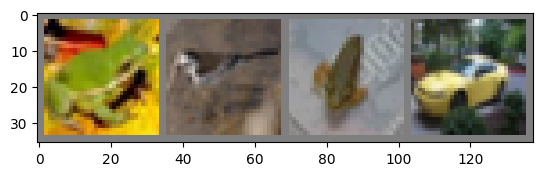

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [33]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [35]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.193
[1,  4000] loss: 1.869
[1,  6000] loss: 1.661
[1,  8000] loss: 1.561
[1, 10000] loss: 1.519
[1, 12000] loss: 1.433
[2,  2000] loss: 1.374
[2,  4000] loss: 1.350
[2,  6000] loss: 1.333
[2,  8000] loss: 1.324
[2, 10000] loss: 1.277
[2, 12000] loss: 1.291
Finished Training


In [36]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %
